# Social Network Graph of Frequently Emailed Enron Employees

In [ ]:
#pip install plotly

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os import path
import networkx as nx
import plotly as py
import plotly.graph_objects as go
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]
print(os.getcwd())

C:\Users\faria\Documents\Summer2020\INF2179\final project


In [5]:
dataset=pd.read_csv(r"C:\Users\faria\Documents\Summer2020\INF2179\final project\dictenron.csv")

In [3]:
pd.set_option("display.max_columns",1000)
pd.set_option("display.max_rows",1000)
pd.set_option("display.width",1000)

In [3]:
dataset

,Subject,Date,From(email),To(email),EmailContent,Spam,NotEnron
0,re:spreads,"Wed, 13 Dec 2000 13:09:00 -0800 (PST)",john.arnold@enron.com,slafontaine@globalp.com,saw a lot of the bulls sell summer against len...,1,0
1,re:summer inverses,"Mon, 11 Dec 2000 08:51:00 -0800 (PST)",john.arnold@enron.com,slafontaine@globalp.com,amazing how with cash futures at $1 and the ba...,1,0
2,Re: congrats,"Tue, 17 Oct 2000 11:56:00 -0700 (PDT)",john.arnold@enron.com,jennifer.fraser@enron.com,We both thank you\n\n\n \n\t\n\t\n\tFrom: J...,1,0
3,Re: Hi,"Tue, 17 Oct 2000 10:36:00 -0700 (PDT)",john.arnold@enron.com,jenwhite7@zdnetonebox.com,"So, what is it? And by the way, don't start ...",1,0
4,Re: Thursday meeting,"Tue, 17 Oct 2000 10:33:00 -0700 (PDT)",john.arnold@enron.com,msagel@home.com,"sure, stop by and we'll arrange a place to mee...",1,0
...,...,...,...,...,...,...,...
42471,FW: click on z link,"Wed, 1 Aug 2001 15:20:16 -0700 (PDT)",matthew.lenhart@enron.com,jason.wolfe@enron.com,"\n\n -----Original Message-----\nFrom: \t""Ryan...",1,0
42472,FW: StealthBomer Flying,"Tue, 20 Nov 2001 11:26:32 -0800 (PST)",matthew.lenhart@enron.com,jason.wolfe@enron.com,\n\n -----Original Message-----\nFrom: \tEric ...,1,0
42473,FW: [Fwd: a day in the life],"Tue, 27 Nov 2001 14:42:38 -0800 (PST)",matthew.lenhart@enron.com,jason.wolfe@enron.com,\n\n -----Original Message-----\nFrom: \tLuis ...,1,0
42474,EOL Team Connection to Operations,"Mon, 21 May 2001 15:38:55 -0700 (PDT)",sally.beck@enron.com,andy.zipper@enron.com,I left you a couple of messages with two diffe...,1,0


In [6]:
#nested dictionary
#create dictionary to collect emails from From(email) column where value is a dictionary containing the to(email) as a key and counter of the number of the times this to(email) is seen
def pairemails(dataset):
    pairs={}
    frequency={}
    for index in range(len(dataset["From(email)"])):
        if dataset["From(email)"][index] not in pairs:
            pairs[dataset["From(email)"][index]]=frequency
        if dataset["To(email)"][index] not in frequency:
            frequency[dataset["To(email)"][index]]=1
        else:
            frequency[dataset["To(email)"][index]]+=1
    return pairs

In [7]:
emaildict=pairemails(dataset)

In [10]:
emaildict

{'john.arnold@enron.com': {'slafontaine@globalp.com': 87,
  'jennifer.fraser@enron.com': 134,
  'jenwhite7@zdnetonebox.com': 37,
  'msagel@home.com': 18,
  'margaret.allen@enron.com': 94,
  'ina.rangel@enron.com': 150,
  'savita.puthigai@enron.com': 10,
  'john.lavorato@enron.com': 128,
  'gary.hickerson@enron.com': 26,
  'mbarksda@ems.jsc.nasa.gov': 3,
  'frank.hayden@enron.com': 35,
  'jennifer.burns@enron.com': 37,
  'gary.taylor@enron.com': 12,
  'david.forster@enron.com': 102,
  'john.griffith@enron.com': 15,
  'kevin.presto@enron.com': 17,
  'adam.r.bayer@vanderbilt.edu': 6,
  'brian.hoskins@enron.com': 38,
  'russell.diamond@enron.com': 139,
  'andy.zipper@enron.com': 57,
  'kori.loibl@enron.com': 15,
  'john.arnold@enron.com': 43,
  'pfse@dynegy.com': 3,
  'mike.maggi@enron.com': 60,
  'hrobertson@hbk.com': 9,
  'sunil.dalal@enron.com': 9,
  'ben.glisan@enron.com': 4,
  'james_naughton@em.fcnbd.com': 3,
  'eric.thode@enron.com': 25,
  'sarah.wesner@enron.com': 34,
  'greg.whall

In [15]:
flist=[]
def dtotup(dictionary):
    for k,v in dictionary.items():
        for i,j in v.items():
            if j>500:
                flist.append((k,i,j))
    return flist

In [16]:
graphtup=dtotup(emaildict)

In [9]:
graphtup

[('john.arnold@enron.com', 'pete.davis@enron.com', 4498),
 ('john.arnold@enron.com', 'suzanne.adams@enron.com', 606),
 ('john.arnold@enron.com', 'vkaminski@aol.com', 2743),
 ('sara.shackleton@enron.com', 'pete.davis@enron.com', 4498),
 ('sara.shackleton@enron.com', 'suzanne.adams@enron.com', 606),
 ('sara.shackleton@enron.com', 'vkaminski@aol.com', 2743),
 ('tana.jones@enron.com', 'pete.davis@enron.com', 4498),
 ('tana.jones@enron.com', 'suzanne.adams@enron.com', 606),
 ('tana.jones@enron.com', 'vkaminski@aol.com', 2743),
 ('kay.mann@enron.com', 'pete.davis@enron.com', 4498),
 ('kay.mann@enron.com', 'suzanne.adams@enron.com', 606),
 ('kay.mann@enron.com', 'vkaminski@aol.com', 2743),
 ('matthew.lenhart@enron.com', 'pete.davis@enron.com', 4498),
 ('matthew.lenhart@enron.com', 'suzanne.adams@enron.com', 606),
 ('matthew.lenhart@enron.com', 'vkaminski@aol.com', 2743),
 ('sally.beck@enron.com', 'pete.davis@enron.com', 4498),
 ('sally.beck@enron.com', 'suzanne.adams@enron.com', 606),
 ('sall

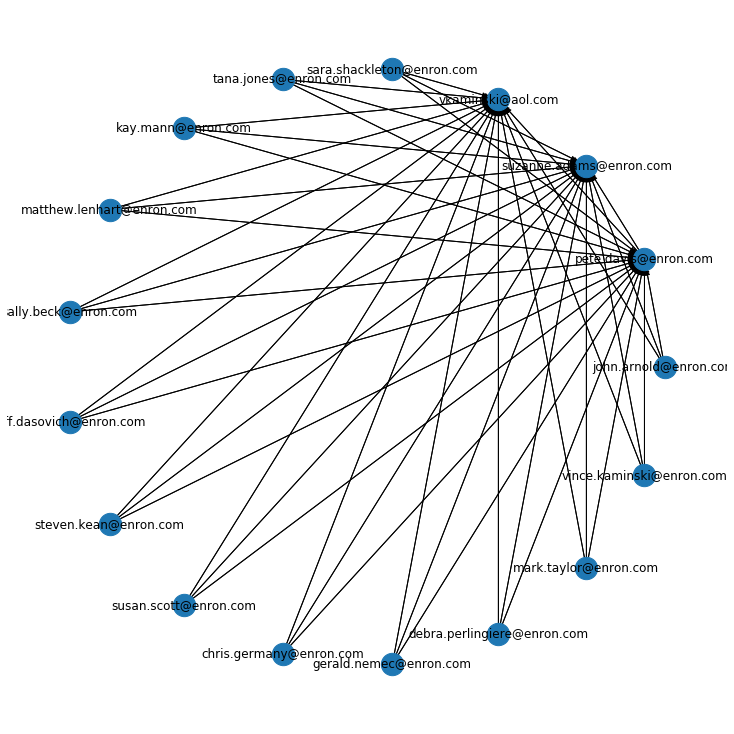

Total number of nodes:  17
Total number of edges:  45


In [59]:
G=nx.MultiDiGraph()
G.add_edges_from(graphtup)
nx.convert_node_labels_to_integers(G, first_label=1, ordering='increasing degree')
#G.add_nodes_from(graphtup)
nx.draw_circular(G)
pos=nx.circular_layout(G, scale=1, center=None, dim=2)
nx.draw_networkx(G, pos=pos, node_size=500)

plt.show()

#nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute="Title")
#plt.figure(figsize=(100,100))

print("Total number of nodes: ", int(G.number_of_nodes()))
print("Total number of edges: ", int(G.number_of_edges()))

In [67]:
pos

{'john.arnold@enron.com': array([1.00000000e+00, 5.25923325e-09]),
 'pete.davis@enron.com': array([0.93247223, 0.36124167]),
 'suzanne.adams@enron.com': array([0.73900891, 0.67369562]),
 'vkaminski@aol.com': array([0.44573836, 0.89516328]),
 'sara.shackleton@enron.com': array([0.09226839, 0.99573414]),
 'tana.jones@enron.com': array([-0.27366293,  0.96182565]),
 'kay.mann@enron.com': array([-0.60263464,  0.79801719]),
 'matthew.lenhart@enron.com': array([-0.85021713,  0.52643215]),
 'sally.beck@enron.com': array([-0.98297306,  0.18374953]),
 'jeff.dasovich@enron.com': array([-0.98297306, -0.18374946]),
 'steven.kean@enron.com': array([-0.85021713, -0.52643208]),
 'susan.scott@enron.com': array([-0.60263469, -0.79801712]),
 'chris.germany@enron.com': array([-0.27366287, -0.96182564]),
 'gerald.nemec@enron.com': array([ 0.0922682 , -0.99573419]),
 'debra.perlingiere@enron.com': array([ 0.44573839, -0.89516327]),
 'mark.taylor@enron.com': array([ 0.73900879, -0.67369578]),
 'vince.kaminsk

KeyError: 'pos'

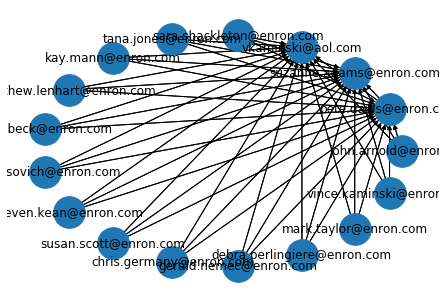

In [65]:

G=nx.MultiDiGraph()
G.add_edges_from(graphtup)
#G.add_nodes_from(graphtup)
nx.draw_circular(G)
pos=nx.circular_layout(G, scale=1, center=None, dim=2)
nx.draw_networkx(G, with_label = True, pos=pos, node_size=1000)
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [11]:
G.nodes()

NodeView(('john.arnold@enron.com', 'pete.davis@enron.com', 'suzanne.adams@enron.com', 'vkaminski@aol.com', 'sara.shackleton@enron.com', 'tana.jones@enron.com', 'kay.mann@enron.com', 'matthew.lenhart@enron.com', 'sally.beck@enron.com', 'jeff.dasovich@enron.com', 'steven.kean@enron.com', 'susan.scott@enron.com', 'chris.germany@enron.com', 'gerald.nemec@enron.com', 'debra.perlingiere@enron.com', 'mark.taylor@enron.com', 'vince.kaminski@enron.com'))

In [66]:
G.edges()

OutMultiEdgeDataView([('john.arnold@enron.com', 'pete.davis@enron.com'), ('john.arnold@enron.com', 'suzanne.adams@enron.com'), ('john.arnold@enron.com', 'vkaminski@aol.com'), ('pete.davis@enron.com', 'pete.davis@enron.com'), ('pete.davis@enron.com', 'suzanne.adams@enron.com'), ('pete.davis@enron.com', 'vkaminski@aol.com'), ('sara.shackleton@enron.com', 'pete.davis@enron.com'), ('sara.shackleton@enron.com', 'suzanne.adams@enron.com'), ('sara.shackleton@enron.com', 'vkaminski@aol.com'), ('tana.jones@enron.com', 'pete.davis@enron.com'), ('tana.jones@enron.com', 'suzanne.adams@enron.com'), ('tana.jones@enron.com', 'vkaminski@aol.com'), ('kay.mann@enron.com', 'pete.davis@enron.com'), ('kay.mann@enron.com', 'suzanne.adams@enron.com'), ('kay.mann@enron.com', 'vkaminski@aol.com'), ('matthew.lenhart@enron.com', 'pete.davis@enron.com'), ('matthew.lenhart@enron.com', 'suzanne.adams@enron.com'), ('matthew.lenhart@enron.com', 'vkaminski@aol.com'), ('sally.beck@enron.com', 'pete.davis@enron.com'), (

In [ ]:
dataset=pd.read_csv(r"C:\Users\faria\Documents\Summer2020\INF2179\final project\finalLabel.csv")